In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from pylab import rcParams

In [6]:
rcParams['figure.figsize'] = 10,8

In [7]:
from sklearn.datasets import load_boston

In [8]:
boston_data=load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [9]:
boston_data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [10]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
# DataFrame-1
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [13]:
X=df[df.columns[0:13]]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
Y=df[df.columns[13:14]]
#Y.head()

In [15]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

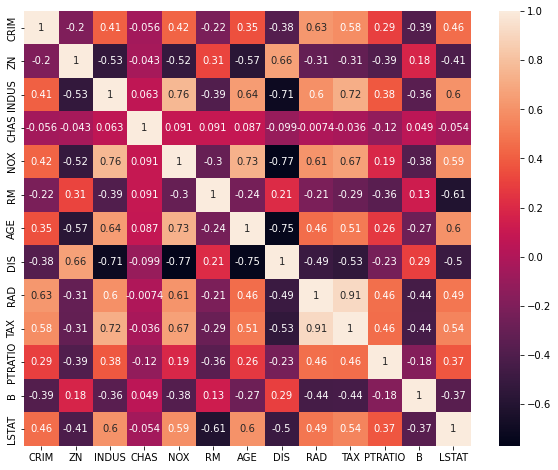

In [16]:
sns.heatmap(X.corr(),annot=True)

In [17]:
# Create Correlation Matrix 

abs_corr_mat=X.corr().abs()   # only value ---- avoids sign of value

abs_corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621
ZN,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800
CHAS,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879
RM,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808
AGE,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339
DIS,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996
RAD,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676
TAX,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993


In [18]:
#up_tri Upper triange of ABS matrix 

# np.triu returns upper triangle matrix with tringle above kth diagonal. # see diagonal below

#[ 0,1,2,3]
#[-1,0,1,2]
#[-2,-1,0,1]
#[-3,-2,-1,0]

# k = 1 will return 

#[Na,Na,2,3]
#[Na,Na,Na,3]
#[Na,Na,Na,Na]
#[Na,Na,Na,Na]

# SAME WORKS FOR "np.tril" to get lower triange

up_tri=abs_corr_mat.where(np.triu(np.ones(abs_corr_mat.shape),k=1).astype(np.bool))

up_tri

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,NaN,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621
ZN,NaN,NaN,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995
INDUS,NaN,NaN,NaN,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800
CHAS,NaN,NaN,NaN,NaN,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929
NOX,NaN,NaN,NaN,NaN,NaN,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879
RM,NaN,NaN,NaN,NaN,NaN,NaN,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494588,0.534432,0.232471,0.291512,0.496996
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,0.464741,0.444413,0.488676
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460853,0.441808,0.543993


In [19]:
correlated_features= [ column for column in up_tri.columns if any(up_tri[column]>0.75) ]

correlated_features

['NOX', 'DIS', 'TAX']

In [20]:
# DataFrame-2 
X1=X.drop(correlated_features,axis=1)
X1.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,65.2,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,78.9,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,61.1,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,45.8,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,7.147,54.2,3.0,18.7,396.90,5.33


In [21]:
X1['MEDV']=boston_data.target
X1.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,6.575,65.2,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,6.421,78.9,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,7.185,61.1,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,6.998,45.8,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,7.147,54.2,3.0,18.7,396.90,5.33,36.2


In [22]:
Y=X1[X1.columns[10:11]]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression, Ridge , Lasso
linear_regression=LinearRegression()

In [25]:
linear_regression.fit(X_train,Y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error
Y_pred=linear_regression.predict(X_test)

print("Mean Squared error: %.1f" % mean_squared_error(Y_test,Y_pred))

Mean Squared error: 0.0


In [27]:
from sklearn.metrics import r2_score

print('R2 Score : %2f' %r2_score(Y_test,Y_pred))

R2 Score : 1.000000


In [28]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute error: %.3f' %mean_absolute_error(Y_test,Y_pred))

Mean Absolute error: 0.000


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X1,Y)

,model,best_score,best_params
0,linear_regression,1.000000,{'normalize': True}
1,lasso,0.999827,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.999203,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [30]:
Y_test['Pred'] = Y_pred
Y_test.head()

,MEDV,Pred
283,50.0,50.0
147,14.6,14.6
64,33.0,33.0
180,39.8,39.8
498,21.2,21.2


In [32]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [34]:
r2_score(Y_test['MEDV'],Y_test['Pred'])

1.0

In [35]:
mean_absolute_error(Y_test['MEDV'],Y_test['Pred'])

7.105427357601002e-15

In [36]:
mean_squared_error(Y_test['MEDV'],Y_test['Pred'])

8.453185974574175e-29